In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score,train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Loading datasets

In [3]:
transaction_details = pd.read_csv('ecommerce_fraud_detection_dataset/customer_transaction_details.csv')
customer_df = pd.read_csv('ecommerce_fraud_detection_dataset/customers_df.csv')

In [4]:
print(transaction_details.shape)
print(customer_df.shape)

(623, 11)
(168, 10)


In [5]:
print(transaction_details.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB
None


In [6]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB
None


In [7]:
transaction_details.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [8]:
customer_df.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


In [9]:
transaction_details.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [10]:
customer_df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [11]:
# Remove the unnamed column from both datasets
transaction_details.drop(columns=['Unnamed: 0'], inplace=True)
customer_df.drop(columns=['Unnamed: 0'], inplace=True)


In [12]:
customer_df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


# Create a new dataset merged_data by Merging the datasets transaction_details and customer_df

In [13]:
# Perform aggregation on transaction_details
customer_transaction_aggregated = transaction_details.groupby('customerEmail').agg({
    'transactionId': lambda x: ', '.join(x),
    'transactionAmount': 'sum',
    'transactionFailed': 'sum'
}).reset_index()

# Merge customer_transaction_aggregated with customer_df
merged_data = pd.merge(customer_df, customer_transaction_aggregated, on='customerEmail', how='left')

# Check the merged DataFrame
print(merged_data.head())


               customerEmail       customerPhone        customerDevice  \
0     josephhoward@yahoo.com        400-108-5415  yyeiaxpltf82440jnb3v   
1     evansjeffery@yahoo.com      1-788-091-7546  r0jpm7xaeqqa3kr6mzum   
2  andersonwilliam@yahoo.com        024.420.0375  4m7h5ipl1shyavt6vv2r   
3      rubenjuarez@yahoo.com  670.664.8168x94985  slovx60t0i558may4ks0   
4           uchen@malone.com      1-981-877-0870  j0pd24k5h8dl2fqu0cz4   

                         customerIPAddress  \
0                             8.129.104.40   
1                          219.173.211.202   
2  67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0   
3  95de:8565:5a66:792c:26e0:6cfb:7d87:11af   
4                           196.89.235.192   

                              customerBillingAddress  No_Transactions  \
0            5493 Jones Islands\nBrownside, CA 51896                2   
1  356 Elizabeth Inlet Suite 120\nPort Joshuabury...                3   
2     8478 Sean Ridges Apt. 441\nDavisberg, PR 72250       

In [14]:
# Drop the Fraud column from its current position
merged_data.drop(columns=['Fraud'], inplace=True)

# Re-add the Fraud column at the rightmost corner
merged_data['Fraud'] = customer_df['Fraud']

# Check the merged dataset
print(merged_data.head())


               customerEmail       customerPhone        customerDevice  \
0     josephhoward@yahoo.com        400-108-5415  yyeiaxpltf82440jnb3v   
1     evansjeffery@yahoo.com      1-788-091-7546  r0jpm7xaeqqa3kr6mzum   
2  andersonwilliam@yahoo.com        024.420.0375  4m7h5ipl1shyavt6vv2r   
3      rubenjuarez@yahoo.com  670.664.8168x94985  slovx60t0i558may4ks0   
4           uchen@malone.com      1-981-877-0870  j0pd24k5h8dl2fqu0cz4   

                         customerIPAddress  \
0                             8.129.104.40   
1                          219.173.211.202   
2  67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0   
3  95de:8565:5a66:792c:26e0:6cfb:7d87:11af   
4                           196.89.235.192   

                              customerBillingAddress  No_Transactions  \
0            5493 Jones Islands\nBrownside, CA 51896                2   
1  356 Elizabeth Inlet Suite 120\nPort Joshuabury...                3   
2     8478 Sean Ridges Apt. 441\nDavisberg, PR 72250       

In [15]:
merged_data.shape

(168, 12)

In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerEmail           168 non-null    object 
 1   customerPhone           168 non-null    object 
 2   customerDevice          168 non-null    object 
 3   customerIPAddress       168 non-null    object 
 4   customerBillingAddress  168 non-null    object 
 5   No_Transactions         168 non-null    int64  
 6   No_Orders               168 non-null    int64  
 7   No_Payments             168 non-null    int64  
 8   transactionId           143 non-null    object 
 9   transactionAmount       143 non-null    float64
 10  transactionFailed       143 non-null    float64
 11  Fraud                   168 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 15.9+ KB


In [17]:
#merged_data.to_csv('merged_data.csv', index=False)


In [18]:
# Check for duplicates based on 'customerEmail' column
duplicate_email_rows = merged_data[merged_data.duplicated(subset=['customerEmail'])]

# Print the duplicate rows based on 'customerEmail'
print("Duplicate rows based on customerEmail:")
print(duplicate_email_rows)


Duplicate rows based on customerEmail:
            customerEmail       customerPhone        customerDevice  \
40   johnlowery@gmail.com    737-377-9701x577  jz66ap43id2y35ivfqa5   
45   johnlowery@gmail.com    +16(4)9016414340  cdx178qymd6vy77nm4x3   
65   johnlowery@gmail.com         04712252182  311kdz4c1210iixltk2j   
79   johnlowery@gmail.com  1-820-539-4726x993  2in0fh7lep289n8dcbdz   
133  johnlowery@gmail.com      1-143-059-1833  tyijaify2hqadwslejyr   
155  johnlowery@gmail.com  076-099-0630x72770  6qy6oa3nqutsyyxzc54c   
165  johnlowery@gmail.com    635.676.0955x524  969zz9zdj8z4gns4sx5p   

                           customerIPAddress  \
40   6c21:ac1d:2089:68fa:abb7:8c00:525f:6588   
45                            222.79.159.140   
65    42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72   
79                            163.128.139.42   
133   e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788   
155  f259:657f:f329:2fca:c06c:8b57:d6ac:2380   
165   f82c:811f:8a02:e2d6:79b:fcaa:42de:570b   

       

# Dropping unnecessary columns

In [19]:
# List of columns to remove
columns_to_remove = ['customerEmail','customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress','transactionId']

# Drop the columns from the DataFrame
df = merged_data.drop(columns=columns_to_remove)

# Check the resulting DataFrame
print(df.head())


   No_Transactions  No_Orders  No_Payments  transactionAmount  \
0                2          2            1               44.0   
1                3          3            7              111.0   
2                5          3            2              131.0   
3                3          3            1               85.0   
4                7          7            6              411.0   

   transactionFailed  Fraud  
0                0.0  False  
1                1.0   True  
2                2.0  False  
3                0.0  False  
4                2.0   True  


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Transactions    168 non-null    int64  
 1   No_Orders          168 non-null    int64  
 2   No_Payments        168 non-null    int64  
 3   transactionAmount  143 non-null    float64
 4   transactionFailed  143 non-null    float64
 5   Fraud              168 non-null    bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 8.0 KB
None


# Handling missing values

In [21]:

# Impute missing values in transactionAmount and transactionFailed columns with their median
df['transactionAmount'].fillna(df['transactionAmount'].median(), inplace=True)
df['transactionFailed'].fillna(df['transactionFailed'].median(), inplace=True)


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Transactions    168 non-null    int64  
 1   No_Orders          168 non-null    int64  
 2   No_Payments        168 non-null    int64  
 3   transactionAmount  168 non-null    float64
 4   transactionFailed  168 non-null    float64
 5   Fraud              168 non-null    bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 8.0 KB
None


# EDA

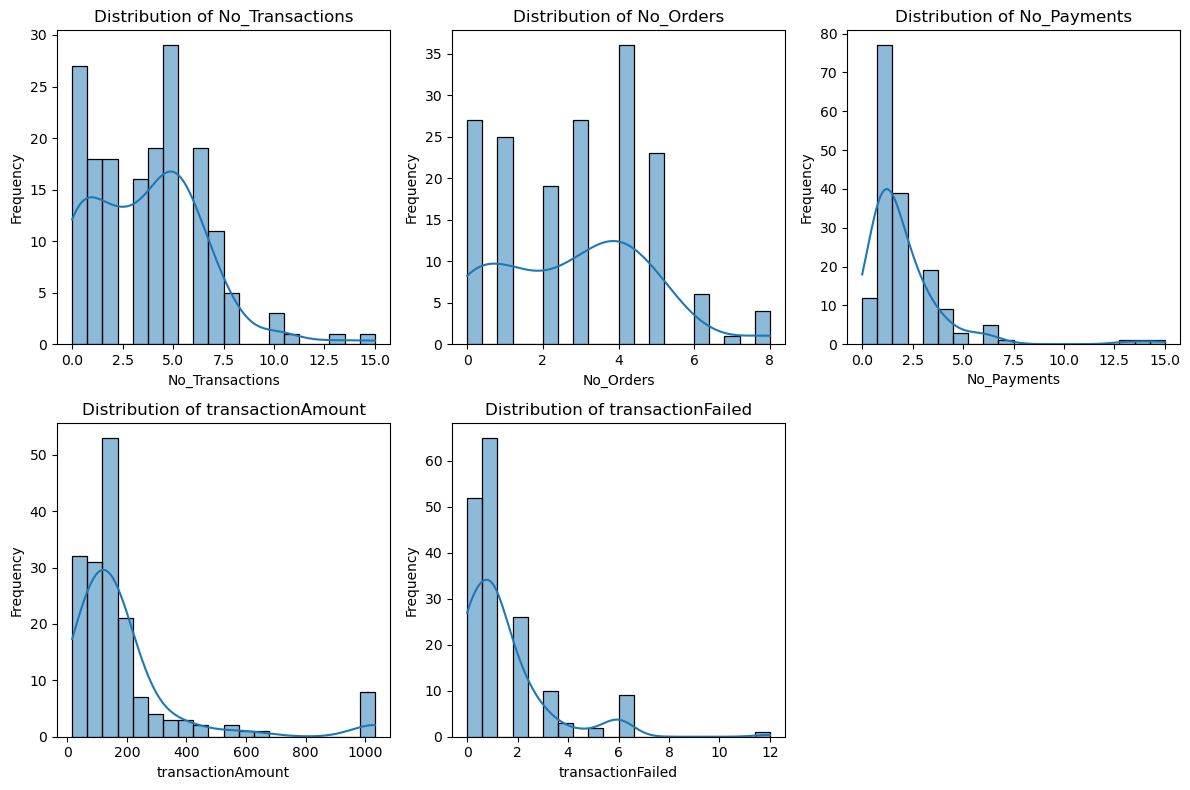

In [23]:
# Define numerical features
numerical_features = ['No_Transactions', 'No_Orders', 'No_Payments', 'transactionAmount', 'transactionFailed']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [24]:
# Count the number of fraudulent and non-fraudulent rows
fraud_counts = df['Fraud'].value_counts()

# Print the counts
print("Number of fraudulent transactions:", fraud_counts[True])
print("Number of non-fraudulent transactions:", fraud_counts[False])


Number of fraudulent transactions: 61
Number of non-fraudulent transactions: 107


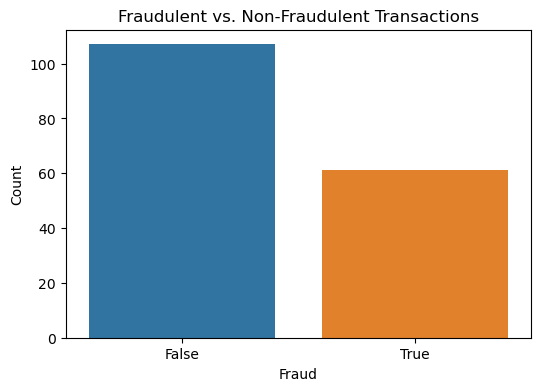

In [25]:
# Bar plot of Fraud counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud', data=df)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

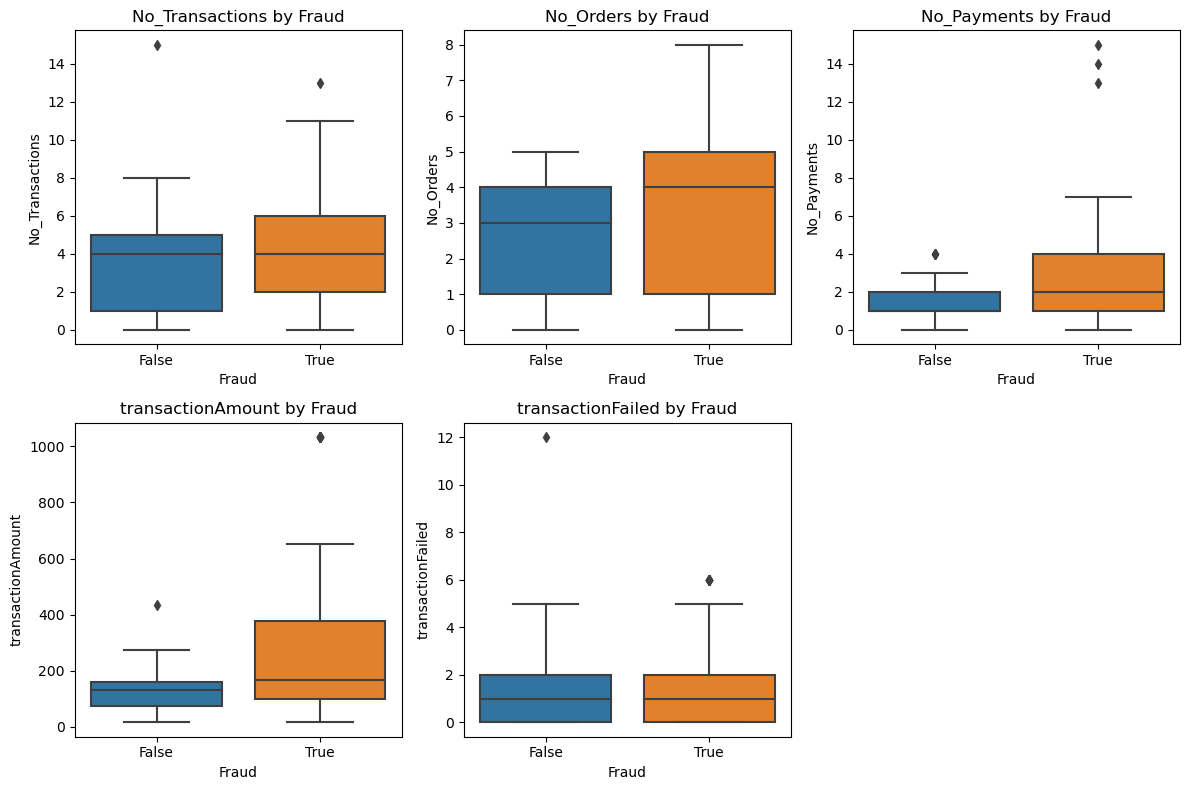

In [26]:

# Box plot of numerical features by Fraud
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Fraud', y=feature, data=df)
    plt.title(f'{feature} by Fraud')
    plt.xlabel('Fraud')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

                   No_Transactions  No_Orders  No_Payments  transactionAmount  \
No_Transactions           1.000000   0.888020     0.225298           0.332820   
No_Orders                 0.888020   1.000000     0.323013           0.328470   
No_Payments               0.225298   0.323013     1.000000          -0.000050   
transactionAmount         0.332820   0.328470    -0.000050           1.000000   
transactionFailed         0.521426   0.228490    -0.061464           0.740745   
Fraud                     0.136451   0.234528     0.357312           0.408038   

                   transactionFailed     Fraud  
No_Transactions             0.521426  0.136451  
No_Orders                   0.228490  0.234528  
No_Payments                -0.061464  0.357312  
transactionAmount           0.740745  0.408038  
transactionFailed           1.000000  0.156080  
Fraud                       0.156080  1.000000  


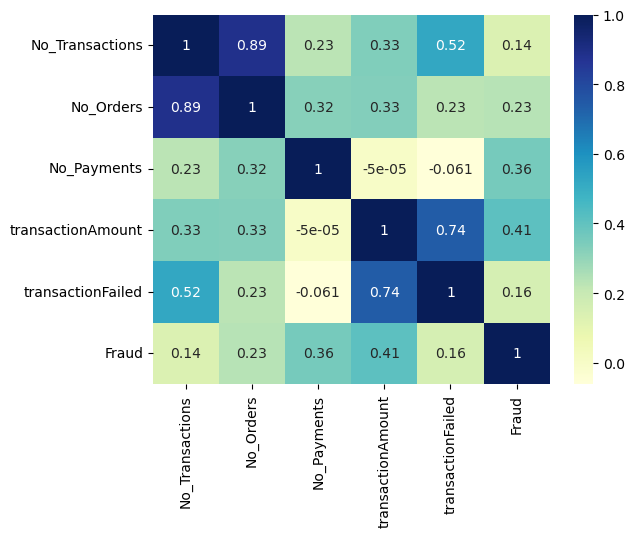

In [27]:
# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
print(df.corr()) 
  
# plotting correlation heatmap 
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 


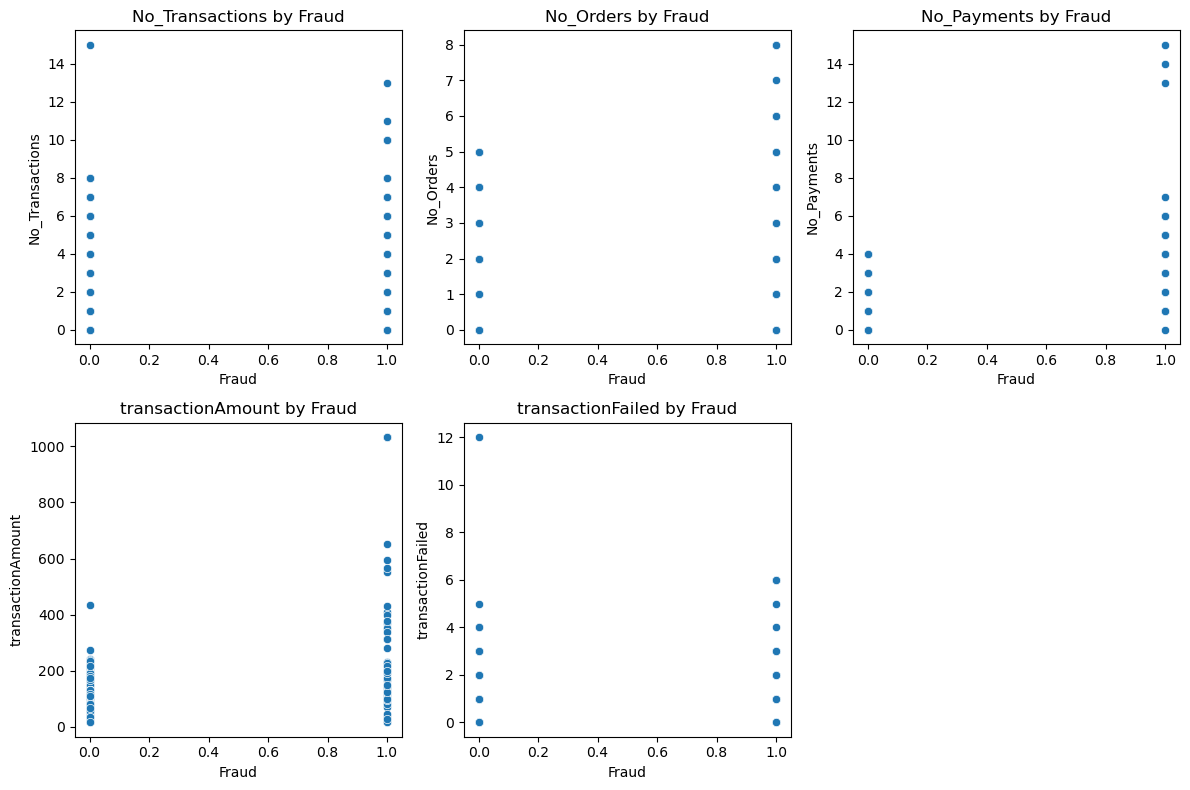

In [28]:
# Scatter plot of numerical features by Fraud
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='Fraud', y=feature, data=df)
    plt.title(f'{feature} by Fraud')
    plt.xlabel('Fraud')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

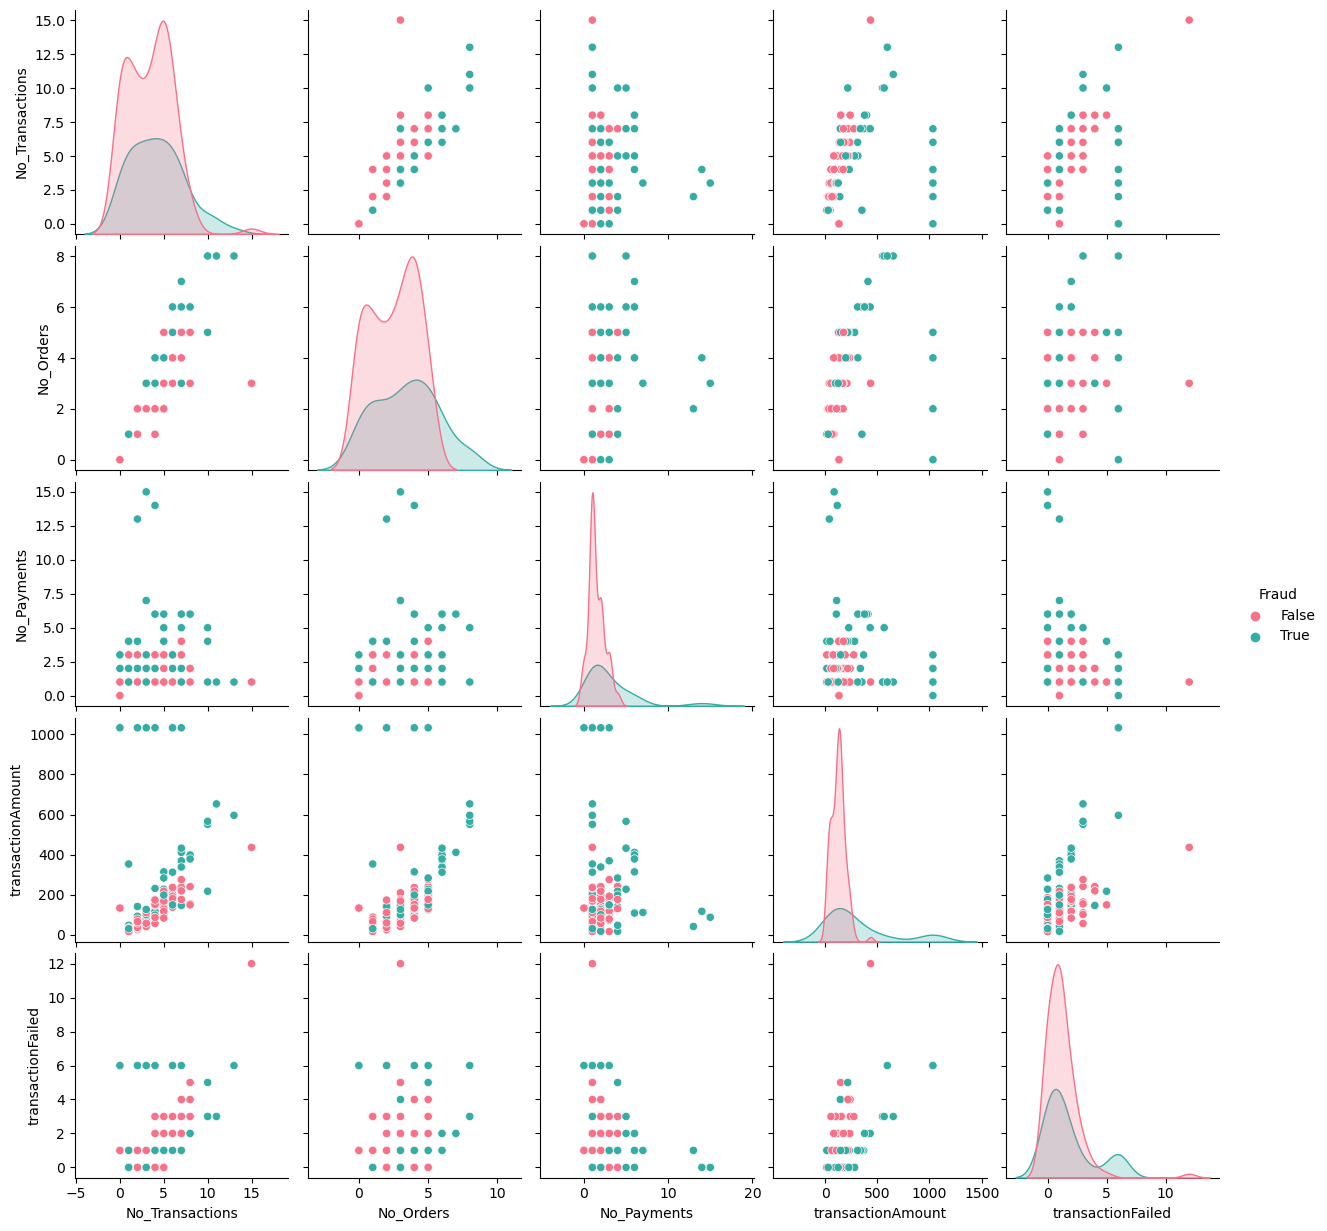

In [29]:
# Pairplot of selected columns
selected_columns = ['No_Transactions', 'No_Orders', 'No_Payments', 'transactionAmount', 'transactionFailed', 'Fraud']
dataplot = sns.pairplot(df[selected_columns], hue='Fraud', palette='husl')
plt.show()

In [30]:
# Define numerical features
numerical_features = ['No_Transactions', 'No_Orders', 'No_Payments', 'transactionAmount', 'transactionFailed']

# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Model Architecture

In [31]:
# Define the features and target variable
X = df.drop(columns=['Fraud'])
y = df['Fraud']


# Perform oversampling to address class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


# Model Training

In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
5/5 [==============================] - 2s 85ms/step - loss: 0.6099 - accuracy: 0.6544 - val_loss: 0.5861 - val_accuracy: 0.6857
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.5986 - accuracy: 0.7059 - val_loss: 0.4877 - val_accuracy: 0.7143
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5099 - accuracy: 0.7353 - val_loss: 0.4715 - val_accuracy: 0.8000
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 0.4724 - accuracy: 0.7426 - val_loss: 0.4827 - val_accuracy: 0.7714
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4785 - accuracy: 0.7574 - val_loss: 0.4587 - val_accuracy: 0.7429
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4704 - accuracy: 0.7574 - val_loss: 0.4363 - val_accuracy: 0.7714
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4420 - accuracy: 0.7721 - val_loss: 0.4364 - val_accuracy: 0.8000
Epoch 8/50
5/5 [===========

# Model accuracy on test dataset

In [33]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


2/2 [==============================] - 0s 17ms/step - loss: 0.2738 - accuracy: 0.9070
Test Accuracy: 0.9069767594337463


# Neural Network achieved the highest accuracy score of approximately 90.69% on the test data. 

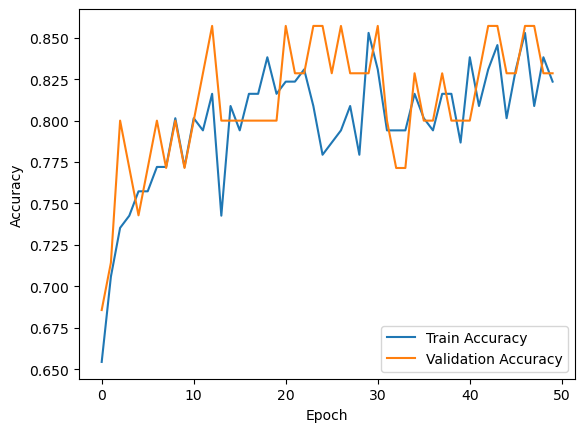

In [34]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
